In [207]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
from mplsoccer.pitch import Pitch

In [208]:
#Leitura do dataset simplificado -> com 165 colunas
df = pd.read_csv('data\players_data_light-2024_2025.csv',index_col='Rk', parse_dates=True)
#df.columns.to_list()

In [209]:
# Seleção de colunas relevantes
selected_columns = [
    'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Min', '90s', 'Starts',
    'Cmp', 'Att', 'Cmp%', 'PrgP', '1/3', 'Tkl', 'TklW', 'Att 3rd', 'Int','PPA','KP',
    'PrgC', 'Att 3rd_stats_possession', 'Gls', 'Ast', 'xG', 'xAG'
]

# Criar DataFrame com colunas selecionadas
df_selected = df[selected_columns]
df_selected

,Player,Nation,Pos,Squad,Comp,Age,Min,90s,Starts,Cmp,...,Att 3rd,Int,PPA,KP,PrgC,Att 3rd_stats_possession,Gls,Ast,xG,xAG
Rk,,,,,,,,,,,,,,,,,,,,,
1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24.0,86,1.0,1,50,...,0,1,0,0,1,15,0,0,0.0,0.0
2,Max Aarons,eng ENG,"DF,MF",Valencia,es La Liga,24.0,120,1.3,1,47,...,0,0,0,1,0,36,0,0,0.0,0.0
3,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,65,0.7,1,17,...,0,1,0,0,3,9,0,0,0.1,0.0
4,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,20.0,88,1.0,0,36,...,0,1,0,0,3,7,0,0,0.1,0.0
5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,3,0.0,0,2,...,0,0,0,0,1,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2850,Edhy Zuliani,fr FRA,DF,Toulouse,fr Ligue 1,19.0,9,0.1,0,2,...,0,1,0,0,0,0,0,0,0.0,0.0
2851,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,26.0,106,1.2,0,27,...,0,1,1,0,1,7,0,0,0.1,0.0
2852,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,25.0,2325,25.8,26,1237,...,3,6,86,63,92,875,3,8,4.8,5.4


In [210]:
# Substituir NaN por 0 nas métricas de desempenho (quando jogador atuou)
df_selected.loc[df_selected['Min']> 0] = df_selected.loc[df_selected['Min'] > 0 ].fillna(0)
df_selected

,Player,Nation,Pos,Squad,Comp,Age,Min,90s,Starts,Cmp,...,Att 3rd,Int,PPA,KP,PrgC,Att 3rd_stats_possession,Gls,Ast,xG,xAG
Rk,,,,,,,,,,,,,,,,,,,,,
1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24.0,86,1.0,1,50,...,0,1,0,0,1,15,0,0,0.0,0.0
2,Max Aarons,eng ENG,"DF,MF",Valencia,es La Liga,24.0,120,1.3,1,47,...,0,0,0,1,0,36,0,0,0.0,0.0
3,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,65,0.7,1,17,...,0,1,0,0,3,9,0,0,0.1,0.0
4,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,20.0,88,1.0,0,36,...,0,1,0,0,3,7,0,0,0.1,0.0
5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,3,0.0,0,2,...,0,0,0,0,1,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2850,Edhy Zuliani,fr FRA,DF,Toulouse,fr Ligue 1,19.0,9,0.1,0,2,...,0,1,0,0,0,0,0,0,0.0,0.0
2851,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,26.0,106,1.2,0,27,...,0,1,1,0,1,7,0,0,0.1,0.0
2852,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,25.0,2325,25.8,26,1237,...,3,6,86,63,92,875,3,8,4.8,5.4


In [211]:
#Identificar as posições existentes
df_selected['Pos'].unique()

array(['DF', 'DF,MF', 'FW', 'MF,FW', 'MF', 'FW,MF', 'GK', 'FW,DF',
       'DF,FW', 'MF,DF'], dtype=object)

In [212]:
#Informações básicas para seleção de atletas entre 20 e 26 anos com minutagem acima de 900 minutos e não seja goleiro
df_filtred = df_selected[
    (df_selected['Age'].between(20,26)) &
    (df_selected['Min']>= 900) &
    (df_selected['Pos']!= 'GK')
]
df_filtred

,Player,Nation,Pos,Squad,Comp,Age,Min,90s,Starts,Cmp,...,Att 3rd,Int,PPA,KP,PrgC,Att 3rd_stats_possession,Gls,Ast,xG,xAG
Rk,,,,,,,,,,,,,,,,,,,,,
7,Himad Abdelli,dz ALG,"MF,FW",Angers,fr Ligue 1,24.0,2842,31.6,32,1373,...,15,26,38,39,107,597,6,1,6.4,3.2
11,Abel,es ESP,DF,Osasuna,es La Liga,23.0,2074,23.0,20,776,...,8,18,18,16,50,357,2,0,0.5,1.0
14,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,21.0,2768,30.8,33,351,...,5,4,15,27,75,438,9,2,8.5,3.8
15,Abner,br BRA,DF,Lyon,fr Ligue 1,24.0,1090,12.1,12,568,...,7,5,11,11,31,225,1,1,0.6,1.1
16,Zakaria Aboukhlal,ma MAR,"MF,FW",Toulouse,fr Ligue 1,24.0,1901,21.1,22,221,...,7,6,10,12,34,363,7,2,10.2,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,Edon Zhegrova,xk KVX,"FW,MF",Lille,fr Ligue 1,25.0,978,10.9,12,316,...,2,4,26,16,37,346,4,1,2.3,2.2
2842,Joshua Zirkzee,nl NED,"FW,MF",Manchester Utd,eng Premier League,23.0,1402,15.6,14,292,...,3,6,6,12,14,219,3,1,4.8,1.5
2845,Nadir Zortea,it ITA,"DF,MF",Cagliari,it Serie A,25.0,2713,30.1,33,557,...,2,19,31,28,69,387,6,2,3.1,2.4


In [213]:
df_filtred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 820 entries, 7 to 2852
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Player                    820 non-null    object 
 1   Nation                    820 non-null    object 
 2   Pos                       820 non-null    object 
 3   Squad                     820 non-null    object 
 4   Comp                      820 non-null    object 
 5   Age                       820 non-null    float64
 6   Min                       820 non-null    int64  
 7   90s                       820 non-null    float64
 8   Starts                    820 non-null    int64  
 9   Cmp                       820 non-null    int64  
 10  Att                       820 non-null    int64  
 11  Cmp%                      820 non-null    float64
 12  PrgP                      820 non-null    int64  
 13  1/3                       820 non-null    int64  
 14  Tkl           

In [214]:
#Filtro para selecionar zagueiros e volantes
df_filtred_df_mf = df_filtred[df_filtred['Pos'].str.contains('^(DF|MF)(,|$)|\b(DF|MF)\b', na=False)]
df_filtred_df_mf

# Calcular estatísticas descritivas
tkl_stats = df_filtred_df_mf['Tkl'].describe()
tklw_stats = df_filtred_df_mf['TklW'].describe()
prgp = df_filtred_df_mf['PrgP'].describe()

# Estatísticas defensivas mínimas para um zagueiro e um volante
df_stats_df_mf = df_filtred_df_mf[
    (df_filtred_df_mf['PrgP']>20) & #Passes progressivos
    (df_filtred_df_mf['Cmp%'] >= 75) & # Precisão de passes
    (df_filtred_df_mf['Tkl'] >= 20) & # Total de Interceptações
    (df_filtred_df_mf['TklW'] >= 15)  #  Interceptações vencidas
    ] 
df_stats_df_mf

# Criar pontuação composta
df_stats_df_mf['Score'] = (
    df_stats_df_mf['PrgP'] +  # Progressão
    (df_stats_df_mf['Cmp%'] - 75) * 2 +  # Bônus por precisão acima de 75%
    df_stats_df_mf['TklW'] * 1.5  # Peso para tackles vencidos
)
df_stats_df_mf = df_stats_df_mf.sort_values(by='Score', ascending=False)
df_stats_df_mf

C:\Users\User\AppData\Local\Temp\ipykernel_11852\293310715.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stats_df_mf['Score'] = (


,Player,Nation,Pos,Squad,Comp,Age,Min,90s,Starts,Cmp,...,Int,PPA,KP,PrgC,Att 3rd_stats_possession,Gls,Ast,xG,xAG,Score
Rk,,,,,,,,,,,,,,,,,,,,,
2061,Pedri,es ESP,MF,Barcelona,es La Liga,21.0,2879,32.0,35,2404,...,26,79,70,92,988,4,5,2.2,7.4,435.8
1508,Manuel Locatelli,it ITA,MF,Juventus,it Serie A,26.0,2822,31.4,34,2134,...,23,31,29,33,408,2,2,1.8,2.5,393.1
1081,Mattéo Guendouzi,fr FRA,MF,Lazio,it Serie A,25.0,3270,36.3,37,1961,...,32,33,43,89,538,1,3,1.4,3.2,377.1
1091,Bruno Guimarães,br BRA,MF,Newcastle Utd,eng Premier League,26.0,3271,36.3,38,1481,...,29,77,52,64,662,5,6,4.3,6.1,356.3
2507,Angelo Stiller,de GER,MF,Stuttgart,de Bundesliga,23.0,2741,30.5,31,2219,...,26,50,59,39,556,1,8,1.8,7.2,354.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,Trevoh Chalobah,eng ENG,DF,Crystal Palace,eng Premier League,25.0,1060,11.8,12,349,...,19,2,4,11,51,3,0,1.2,0.4,66.0
1412,Frans Krätzig,de GER,"DF,MF",Heidenheim,de Bundesliga,21.0,1217,13.5,15,419,...,17,14,28,25,210,1,2,0.6,1.8,65.8
2647,Lukas Ullrich,de GER,DF,Gladbach,de Bundesliga,20.0,1903,21.1,24,647,...,23,9,8,31,218,1,2,0.9,1.8,65.2


SELEÇÃO DE ZAGUEIROS

In [231]:
# Selecionar os 5 melhores zagueiros:
df_top_df = df_stats_df_mf[df_stats_df_mf['Pos'].str.contains('DF')].nlargest(5, 'Score')
df_top_df
#f_top_df.to_csv('top_5_df.csv', index=False)

,Player,Nation,Pos,Squad,Comp,Age,Min,90s,Starts,Cmp,...,Int,PPA,KP,PrgC,Att 3rd_stats_possession,Gls,Ast,xG,xAG,Score
Rk,,,,,,,,,,,,,,,,,,,,,
435,Moisés Caicedo,ec ECU,"MF,DF",Chelsea,eng Premier League,22.0,3351,37.2,38,1967,...,49,34,30,43,476,1,2,0.8,3.0,353.9
1107,Joško Gvardiol,hr CRO,DF,Manchester City,eng Premier League,22.0,3277,36.4,36,2454,...,44,20,26,91,815,5,0,4.6,2.1,352.9
2667,Federico Valverde,uy URU,"MF,DF",Real Madrid,es La Liga,26.0,3032,33.7,34,2010,...,55,31,39,66,572,6,4,2.7,3.1,300.8
1137,Jan Paul van Hecke,nl NED,DF,Brighton,eng Premier League,24.0,2958,32.9,33,2016,...,24,17,15,55,166,1,1,1.3,1.5,297.9
1120,Achraf Hakimi,ma MAR,DF,Paris S-G,fr Ligue 1,25.0,2066,23.0,24,1898,...,31,37,50,93,974,4,6,2.9,6.2,264.4


In [235]:
#Tabela com os colunas de interesse
df_top_df = df_top_df[['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Min', 'Cmp', 'Cmp%', 'PrgP', 'Tkl', 'TklW', 'Int', 'PrgC', 'Score']]
df_top_df

,Player,Nation,Pos,Squad,Comp,Age,Min,Cmp,Cmp%,PrgP,Tkl,TklW,Int,PrgC,Score
Rk,,,,,,,,,,,,,,,
435,Moisés Caicedo,ec ECU,"MF,DF",Chelsea,eng Premier League,22.0,3351,1967,89.7,215,114,73,49,43,353.9
1107,Joško Gvardiol,hr CRO,DF,Manchester City,eng Premier League,22.0,3277,2454,90.2,264,58,39,44,91,352.9
2667,Federico Valverde,uy URU,"MF,DF",Real Madrid,es La Liga,26.0,3032,2010,89.9,226,50,30,55,66,300.8
1137,Jan Paul van Hecke,nl NED,DF,Brighton,eng Premier League,24.0,2958,2016,88.2,228,45,29,24,55,297.9
1120,Achraf Hakimi,ma MAR,DF,Paris S-G,fr Ligue 1,25.0,2066,1898,88.7,183,48,36,31,93,264.4


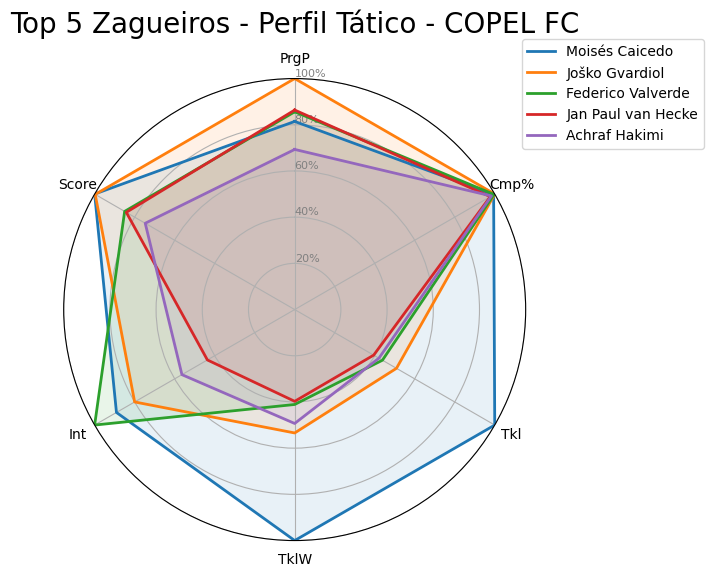

In [232]:
# Função para criar gráfico de radar
def plot_radar_chart(data, title):
    categories = ['PrgP', 'Cmp%', 'Tkl','TklW', 'Int', 'Score']
    N = len(categories)

    # Normalizar os dados (0 a 1)
    max_values = data[categories].max()
    normalized_data = data[categories].div(max_values)

    # Configurar o gráfico
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories)
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["20%", "40%", "60%", "80%", "100%"], color="grey", size=8)
    plt.ylim(0, 1)

    # Plotar para cada jogador
    for i, row in normalized_data.iterrows():
        values = row.tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=data.loc[i, 'Player'])
        ax.fill(angles, values, alpha=0.1)

    plt.title(title, size=20, color='black', y=1.08)
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.1))
    plt.show()

# Gerar gráfico
plot_radar_chart(df_top_df, 'Top 5 Zagueiros - Perfil Tático - COPEL FC')

SELEÇÃO DE VOLANTES

In [243]:
# Selecionar os 5 melhores volantes:
df_top_mf = df_stats_df_mf[df_stats_df_mf['Pos'].str.contains('MF')].nlargest(5, 'Score')
df_top_mf
#df_top_mf.to_csv('top_5_mf.csv', index=False)   

,Player,Nation,Pos,Squad,Comp,Age,Min,90s,Starts,Cmp,...,Int,PPA,KP,PrgC,Att 3rd_stats_possession,Gls,Ast,xG,xAG,Score
Rk,,,,,,,,,,,,,,,,,,,,,
2061,Pedri,es ESP,MF,Barcelona,es La Liga,21.0,2879,32.0,35,2404,...,26,79,70,92,988,4,5,2.2,7.4,435.8
1508,Manuel Locatelli,it ITA,MF,Juventus,it Serie A,26.0,2822,31.4,34,2134,...,23,31,29,33,408,2,2,1.8,2.5,393.1
1081,Mattéo Guendouzi,fr FRA,MF,Lazio,it Serie A,25.0,3270,36.3,37,1961,...,32,33,43,89,538,1,3,1.4,3.2,377.1
1091,Bruno Guimarães,br BRA,MF,Newcastle Utd,eng Premier League,26.0,3271,36.3,38,1481,...,29,77,52,64,662,5,6,4.3,6.1,356.3
2507,Angelo Stiller,de GER,MF,Stuttgart,de Bundesliga,23.0,2741,30.5,31,2219,...,26,50,59,39,556,1,8,1.8,7.2,354.3


In [247]:
df_top_mf.columns.to_list()

['Player',
 'Nation',
 'Pos',
 'Squad',
 'Comp',
 'Age',
 'Min',
 'Cmp',
 'Cmp%',
 'PrgP',
 'Tkl',
 'TklW',
 'Int',
 'PrgC',
 '1/3',
 'Score']

In [248]:
#Tabela com os colunas de interesse
df_top_mf = df_top_mf[['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Min', 'Cmp', 'Cmp%', 'PrgP', 'Tkl', 'TklW', 'Int', 'PrgC','1/3', 'Score']]
df_top_df

,Player,Nation,Pos,Squad,Comp,Age,Min,Cmp,Cmp%,PrgP,Tkl,TklW,Int,PrgC,Score
Rk,,,,,,,,,,,,,,,
435,Moisés Caicedo,ec ECU,"MF,DF",Chelsea,eng Premier League,22.0,3351,1967,89.7,215,114,73,49,43,353.9
1107,Joško Gvardiol,hr CRO,DF,Manchester City,eng Premier League,22.0,3277,2454,90.2,264,58,39,44,91,352.9
2667,Federico Valverde,uy URU,"MF,DF",Real Madrid,es La Liga,26.0,3032,2010,89.9,226,50,30,55,66,300.8
1137,Jan Paul van Hecke,nl NED,DF,Brighton,eng Premier League,24.0,2958,2016,88.2,228,45,29,24,55,297.9
1120,Achraf Hakimi,ma MAR,DF,Paris S-G,fr Ligue 1,25.0,2066,1898,88.7,183,48,36,31,93,264.4


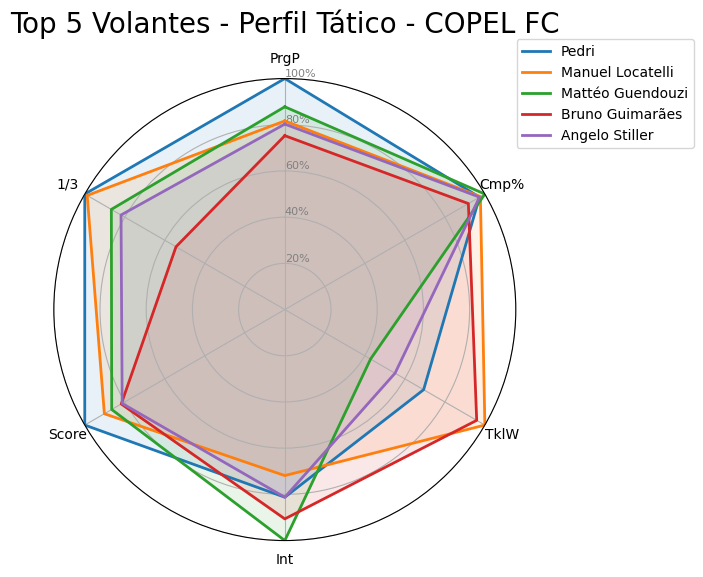

In [249]:
# Função para criar gráfico de radar
def plot_radar_chart(data, title):
    categories = ['PrgP', 'Cmp%', 'TklW', 'Int', 'Score', '1/3']
    N = len(categories)

    # Normalizar os dados (0 a 1)
    max_values = data[categories].max()
    normalized_data = data[categories].div(max_values)

    # Configurar o gráfico
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories)
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["20%", "40%", "60%", "80%", "100%"], color="grey", size=8)
    plt.ylim(0, 1)

    # Plotar para cada jogador
    for i, row in normalized_data.iterrows():
        values = row.tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=data.loc[i, 'Player'])
        ax.fill(angles, values, alpha=0.1)

    plt.title(title, size=20, color='black', y=1.08)
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.1))
    plt.show()

# Gerar gráfico
plot_radar_chart(df_top_mf, 'Top 5 Volantes - Perfil Tático - COPEL FC')

SELEÇÃO DE ATACANTES

In [233]:
#Filtro para selecionar atacantes
df_filtred_fw = df_filtred[df_filtred['Pos'].str.contains('^(FW|MF)(,|$)|\b(FW|MF)\b', na=False)]
df_filtred_fw

# Calcular estatísticas descritivas
kp_stats = df_filtred_fw['KP'].describe()
ppa_stats = df_filtred_fw['PPA'].describe()
xg_stats = df_filtred_fw['xG'].describe()
prgp_stats = df_filtred_fw['PrgP'].describe()


# Estatísticas defensivas mínimas para um zagueiro e um volante
df_stats_fw = df_filtred_fw[
    (df_filtred_fw['PrgP']>40) & #Passes progressivos
    (df_filtred_fw['xG'] >= 1.5) & # Expectativa de gols
    (df_filtred_fw['KP'] >= 15) & # Passes chave
    (df_filtred_fw['PPA'] >= 10)&   #  Passes para ações de perigo
    (df_filtred_fw['TklW'] >= 15) &
    (df_filtred_fw['Int'] >= 10)
    ] 
df_stats_fw


# Criar pontuação composta
df_stats_fw['Score'] = (
    df_stats_fw['xG'] * 1.3 +  
    df_stats_fw['PPA'] * 1.5 +  # Peso para passes para ações de perigo
    df_stats_fw['KP'] * 1.5 +  # Peso para passes chave
    df_stats_fw['TklW'] * 1.0 +  # Peso para tackles vencidos
    df_stats_fw['Int'] * 1.2  # Peso para interceptações    
)
df_stats_fw = df_stats_fw.sort_values(by='Score', ascending=False)
df_top_fw = df_stats_fw.nlargest(5, 'Score')
df_top_fw

C:\Users\User\AppData\Local\Temp\ipykernel_11852\2531387870.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stats_fw['Score'] = (


,Player,Nation,Pos,Squad,Comp,Age,Min,90s,Starts,Cmp,...,Int,PPA,KP,PrgC,Att 3rd_stats_possession,Gls,Ast,xG,xAG,Score
Rk,,,,,,,,,,,,,,,,,,,,,
201,Alex Baena,es ESP,"MF,FW",Villarreal,es La Liga,23.0,2595,28.8,30,857,...,22,72,95,91,762,7,9,7.1,11.7,301.13
2061,Pedri,es ESP,MF,Barcelona,es La Liga,21.0,2879,32.0,35,2404,...,26,79,70,92,988,4,5,2.2,7.4,291.56
652,Mikkel Damsgaard,dk DEN,"MF,FW",Brentford,eng Premier League,24.0,2911,32.3,34,1107,...,27,73,63,73,712,2,10,2.8,8.4,284.04
2034,Cole Palmer,eng ENG,"MF,FW",Chelsea,eng Premier League,22.0,3191,35.5,36,1140,...,11,64,87,120,901,15,8,17.3,10.9,282.19
1091,Bruno Guimarães,br BRA,MF,Newcastle Utd,eng Premier League,26.0,3271,36.3,38,1481,...,29,77,52,64,662,5,6,4.3,6.1,280.89


In [220]:
#Visualização das métricas descritivas para os zagueiros e volantes
print('métricas Tkl:\n'+ f'{tkl_stats}\n')
print('métricas Tklw:\n'+ f'{tklw_stats}\n')    
print('métricas PrgP:\n'+ f'{prgp}')

métricas Tkl:
count    611.000000
mean      40.068740
std       19.766718
min        5.000000
25%       26.000000
50%       37.000000
75%       51.000000
max      116.000000
Name: Tkl, dtype: float64

métricas Tklw:
count    611.000000
mean      24.284779
std       12.575441
min        2.000000
25%       15.000000
50%       23.000000
75%       31.000000
max       79.000000
Name: TklW, dtype: float64

métricas PrgP:
count    611.000000
mean      85.446809
std       49.772713
min       15.000000
25%       50.000000
50%       74.000000
75%      110.500000
max      360.000000
Name: PrgP, dtype: float64


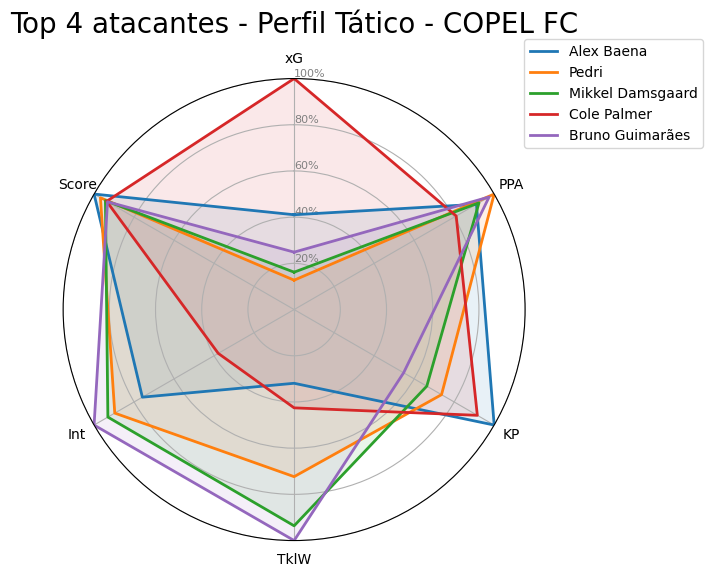

In [234]:
# Função para criar gráfico de radar
def plot_radar_chart(data, title):
    categories = ['xG', 'PPA', 'KP', 'TklW', 'Int', 'Score']
    N = len(categories)

    # Normalizar os dados (0 a 1)
    max_values = data[categories].max()
    normalized_data = data[categories].div(max_values)

    # Configurar o gráfico
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories)
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["20%", "40%", "60%", "80%", "100%"], color="grey", size=8)
    plt.ylim(0, 1)

    # Plotar para cada jogador
    for i, row in normalized_data.iterrows():
        values = row.tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=data.loc[i, 'Player'])
        ax.fill(angles, values, alpha=0.1)

    plt.title(title, size=20, color='black', y=1.08)
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.1))
    plt.show()

# Gerar gráfico
plot_radar_chart(df_top_fw, 'Top 4 atacantes - Perfil Tático - COPEL FC')

In [222]:
#Visualização das métricas descritivas para atacantes
print('métricas KP:\n'+ f'{kp_stats}\n')
print('métricas PPA:\n'+ f'{ppa_stats}\n')    
print('métricas xG:\n'+ f'{xg_stats}\n')
print('métricas PrgP:\n'+ f'{prgp_stats}\n')    

métricas KP:
count    488.000000
mean      24.360656
std       14.973798
min        3.000000
25%       14.000000
50%       21.000000
75%       30.000000
max       95.000000
Name: KP, dtype: float64

métricas PPA:
count    488.000000
mean      19.694672
std       15.551828
min        0.000000
25%        9.000000
50%       15.000000
75%       26.000000
max      111.000000
Name: PPA, dtype: float64

métricas xG:
count    488.000000
mean       4.241598
std        3.884325
min        0.100000
25%        1.500000
50%        3.000000
75%        5.625000
max       25.900000
Name: xG, dtype: float64

métricas PrgP:
count    488.000000
mean      76.157787
std       52.982289
min        6.000000
25%       38.000000
50%       64.000000
75%       99.000000
max      360.000000
Name: PrgP, dtype: float64



In [ ]:
#df_top_fw.to_csv('top_5_fw.csv', index=False)